In [1]:
# Import modules (must run this cell)
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.ticker as ticker
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.themes import Theme
from sklearn.metrics.pairwise import euclidean_distances
import itertools
%matplotlib widget


In [2]:
# Specify your filter folder path (must run this cell)
folder_path = r'C:\\Users\\dziug\\Desktop\\Filter folder'

# Get all files in the folder
files = os.listdir(folder_path)

# Filter out the files that are not CSV
csv_files = [f for f in files if f.endswith('.csv')]

In [3]:
# File processing function (must run this cell)

def process_file(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, decimal=',', sep='; ', skiprows=2, dtype=str, engine='python', names=['Wavelength', 'Transmission'])

    # Strip leading and trailing spaces from column values
    df['Wavelength'] = df['Wavelength'].str.strip()
    df['Transmission'] = df['Transmission'].str.strip()

    # Remove semicolons and replace commas with periods in the 'Transmission' column
    df['Transmission'] = df['Transmission'].str.replace(';', '').str.replace(',', '.')

    # Convert the columns to numeric
    df['Wavelength'] = pd.to_numeric(df['Wavelength'], errors='coerce')
    df['Transmission'] = pd.to_numeric(df['Transmission'], errors='coerce')

    # Drop any rows with NaN values
    df = df.dropna()

    return df

In [4]:
# Plotting function (must run this cell)

def plot_data(plots):
    # Initialize the current position
    curr_pos = 0

    # Define a function to handle key press events
    def key_event(e):
        nonlocal curr_pos

        # If the right arrow key is pressed, increment the current position
        if e.key == "right":
            curr_pos = curr_pos + 1
        # If the left arrow key is pressed, decrement the current position
        elif e.key == "left":
            curr_pos = curr_pos - 1
        else:
            return
        # Ensure the current position wraps around the length of the plots list
        curr_pos = curr_pos % len(plots)

        # Clear the current axes
        ax.cla()
        # Plot the data at the current position
        ax.plot(plots[curr_pos][0], plots[curr_pos][1])
        # Set the title to the file name at the current position
        ax.set_title(plots[curr_pos][2])
        # Set the x and y labels
        ax.set_xlabel('Wavelength')
        ax.set_ylabel('Transmission')
        # Set y axis limits
        ax.set_ylim(0, 100)
        # Redraw the figure
        fig.canvas.draw()

    # Create a new figure
    fig = plt.figure()
    # Connect the key press event to the key_event function
    fig.canvas.mpl_connect('key_press_event', key_event)
    # Add a subplot to the figure
    ax = fig.add_subplot(111)
    # Plot the data at the current position
    ax.plot(plots[curr_pos][0], plots[curr_pos][1])
    # Set the title to the file name at the current position
    ax.set_title(plots[curr_pos][2])
    # Set the x and y labels
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Transmission')
    # Set y axis limits
    ax.set_ylim(0, 100)
    # Display the figure
    plt.show()

In [5]:
# Search for a filter to see a filter list, press enter if you want to see all files
search_text = input("Enter text to search in file names: ")

# Find and print files that contain the search text in their names
matching_files = [file for file in files if search_text in file]
print(f"Number of files matching your search: {len(matching_files)}\n")
for file in matching_files:
    print(file)

Number of files matching your search: 188

3C10 3mm.Sample.csv
3C11 3mm.Sample.csv
3C3 3mm.Sample.csv
3C7 5mm.Sample.csv
3C8 3mm.Sample.csv
A1.Sample.Raw.csv
A10.Sample.Raw.csv
A11.Sample.Raw.csv
A12.Sample.Raw.csv
A13.Sample.Raw.csv
A14.Sample.Raw.csv
A15.Sample.Raw.csv
A16.Sample.Raw.csv
A17.Sample.Raw.csv
A18.Sample.Raw.csv
A19.Sample.Raw.csv
A2.Sample.Raw.csv
A20.Sample.Raw.csv
A21.Sample.Raw.csv
A22.Sample.Raw.csv
A23.Sample.Raw.csv
A24.Sample.Raw.csv
A25.Sample.Raw.csv
A26.Sample.Raw.csv
A27.Sample.Raw.csv
A28.Sample.Raw.csv
A29.Sample.Raw.csv
A3.Sample.Raw.csv
A30.Sample.Raw.csv
A4.Sample.Raw.csv
A5.Sample.Raw.csv
A6.Sample.Raw.csv
A7.Sample.Raw.csv
A8.Sample.Raw.csv
A9.Sample.Raw.csv
B1.Sample.Raw.csv
B10.Sample.Raw.csv
B11.Sample.Raw.csv
B12.Sample.Raw.csv
B13.Sample.Raw.csv
B14.Sample.Raw.csv
B15.Sample.Raw.csv
B16.Sample.Raw.csv
B17.Sample.Raw.csv
B18.Sample.Raw.csv
B19.Sample.Raw.csv
B2.Sample.Raw.csv
B20.Sample.Raw.csv
B21.Sample.Raw.csv
B22.Sample.Raw.csv
B23.Sample.Raw.c

Number of files matching your search: 1



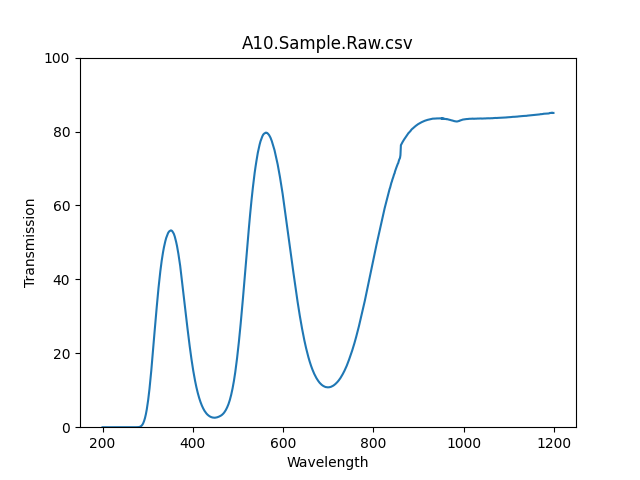

In [6]:
# Search for a filter and plot it, press enter if you want to see all files
search_text = input("Enter the filter you want to plot: ")

# Find and print files that contain the search text in their names
matching_files = [file for file in files if search_text in file]
print(f"Number of files matching your search: {len(matching_files)}\n")

# Create a list of dataframes from the matching files
plots = []
for file_name in matching_files:
    file_path = os.path.join(folder_path, file_name)
    
    # Call the process_file function to get a dataframe
    df = process_file(file_path)
    
    # Check if 'Wavelength' and 'Transmission' are in the dataframe columns
    if 'Wavelength' in df.columns and 'Transmission' in df.columns:
        # Append the Wavelength and Transmission data, along with the file name to the plots list
        plots.append((df['Wavelength'], df['Transmission'], file_name))

# Call the plotting function with your data
plot_data(plots)

In [7]:
# Adjust desired filter parameters

# Wavelegth to filter out
# This is the range where you want to reduce the intensity of the light
wavelength_filter_start = 400 
wavelength_filter_end = 440
transmission_filter_max = 30 # This is the maximum transmission value you want to keep in this range

# Wavelength to keep
# This is the range where you don't want the ligth intensity to be reduced
wavelength_keep_start = 350
wavelength_keep_end = 400
transmission_keep_min = 10 # This is the minimum transmission value you want to keep in this range

In [10]:
# Filter finding script

# Lists to store the file names and the maximum and minimum transmission values
matching_files = []
matching_max_transmissions = []
matching_min_transmissions = []

non_matching_files = []
non_matching_max_transmissions = []
non_matching_min_transmissions = []

# Loop through all files
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    
    # Call the function to process the file
    df = process_file(file_path)

     # Filter the DataFrame in the range you want to filter out
    df_filtered_filter = df[(df['Wavelength'] >= wavelength_filter_start) & (df['Wavelength'] <= wavelength_filter_end)]

    # Filter the DataFrame in the range you want to keep
    df_filtered_keep = df[(df['Wavelength'] >= wavelength_keep_start) & (df['Wavelength'] <= wavelength_keep_end)]
    
    # Get the maximum and minimum transmission values in the selected ranges
    max_transmission = df_filtered_filter['Transmission'].max()
    min_transmission = df_filtered_keep['Transmission'].min()
    
    # Create a string that represents the wavelength range
    wavelength_range_filter = f"({wavelength_filter_start}, {wavelength_filter_end})"
    wavelength_range_keep = f"({wavelength_keep_start}, {wavelength_keep_end})"

    # Check if the maximum transmission value in wavelength range to filter out is below the limit
    # Check if the minimum transmission value in wavelength range to keep is above the limit
    if max_transmission < transmission_filter_max and min_transmission > transmission_keep_min:
        matching_files.append(file_name)
        matching_max_transmissions.append(max_transmission)
        matching_min_transmissions.append(min_transmission)
    else:
        non_matching_files.append(file_name)
        non_matching_max_transmissions.append(max_transmission)
        non_matching_min_transmissions.append(min_transmission)

# Create column names with the wavelength ranges
max_transmission_column = f"Max: {wavelength_range_filter}"
min_transmission_column = f"Min: {wavelength_range_keep}"

# Create DataFrames for the matching and non-matching files
matching_df = pd.DataFrame({max_transmission_column: matching_max_transmissions, 
                            min_transmission_column: matching_min_transmissions, 
                            'File Name': matching_files})

non_matching_df = pd.DataFrame({max_transmission_column: non_matching_max_transmissions, 
                                min_transmission_column: non_matching_min_transmissions, 
                                'File Name': non_matching_files})

# Sort the DataFrames by increasing maximum transmission values
matching_df = matching_df.sort_values(by=max_transmission_column)
non_matching_df = non_matching_df.sort_values(by=max_transmission_column)

# Print the DataFrames
# Set the maximum number of rows to display to None
pd.set_option('display.max_rows', None)
print(f"Number of files: {len(csv_files)}")
print(f"Number of files matching your search: {len(matching_files)}\n")
print("Matching Files:")
print(matching_df)
print("\nNon-Matching Files:")

print(non_matching_df)

Number of files: 188
Number of files matching your search: 4

Matching Files:
   Max: (400, 440)  Min: (350, 400)             File Name
0          15.9978          15.9978    A10.Sample.Raw.csv
2          18.3900          15.3100    OC6 3mm.Sample.csv
3          22.3000          22.3000  Z3C18 3mm.Sample.csv
1          23.6800          10.5000    B12.Sample.Raw.csv

Non-Matching Files:
     Max: (400, 440)  Min: (350, 400)                        File Name
125        -0.002537        -0.007499                R1.Sample.Raw.csv
16         -0.002119        -0.024754               A20.Sample.Raw.csv
140        -0.001814        -0.020974               R23.Sample.Raw.csv
22         -0.001805        -0.017669               A26.Sample.Raw.csv
9          -0.001805        -0.029545               A14.Sample.Raw.csv
157        -0.001698        -0.022954                R4.Sample.Raw.csv
20         -0.001383        -0.015406               A24.Sample.Raw.csv
18         -0.001171        -0.016195      

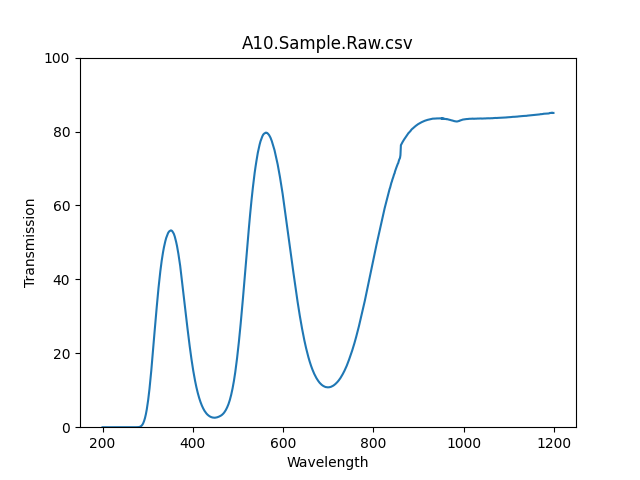

In [11]:
# Plot matching filters

# Create a list of dataframes from the matching files
plots = []
for index, row in matching_df.iterrows():
    file_name = row['File Name']
    file_path = os.path.join(folder_path, file_name)
    
    # Call the function to process the file
    df = process_file(file_path)
    
    # Check if 'Wavelength' and 'Transmission' are in the dataframe columns
    if 'Wavelength' in df.columns and 'Transmission' in df.columns:
        # Append the Wavelength and Transmission data, along with the file name to the plots list
        plots.append((df['Wavelength'], df['Transmission'], file_name))


# Call the function for plotting with your data
plot_data(plots)

Plots similar to A10.Sample.Raw.csv:
Z3C18 3mm.Sample.csv: 85.48749778055094
R12.Sample.Raw.csv: 63.599981583530614
B10.Sample.Raw.csv: 63.17442055199156
OC6 3mm.Sample.csv: 62.24177099365194
R13.Sample.Raw.csv: 61.94848787639085


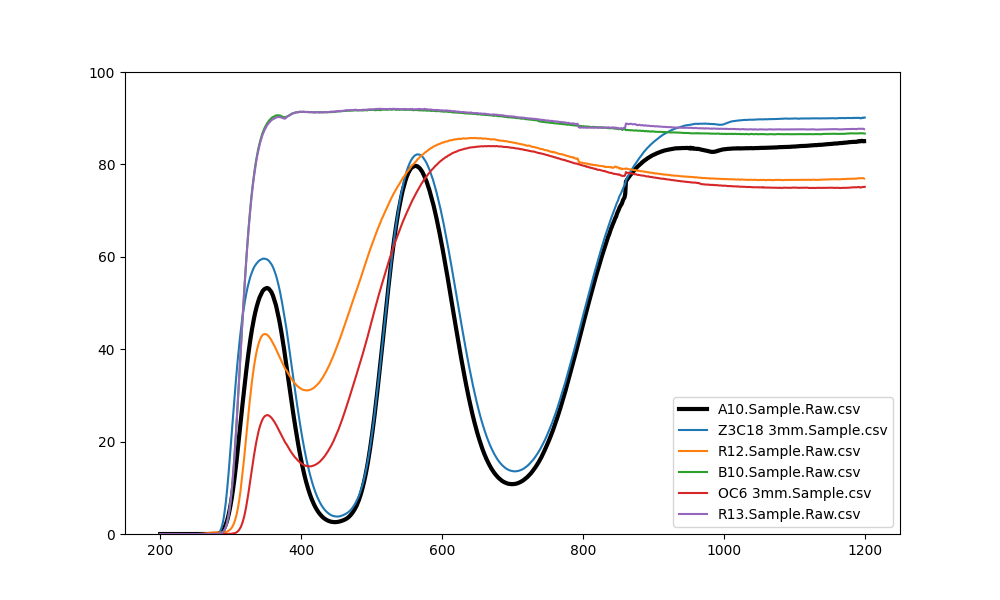

In [12]:
# Find similar filters

# Call file processing function
df = process_file(file_path)

# Specify for witch filter you want to find similar other filters
search_text = input("Type for witch filter you want to find similar other filters: ")

# Create a list of dataframes from all files
all_plots = []
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    
    # Call the process_file function to get a dataframe
    df = process_file(file_path)
        
    # Check if 'Wavelength' and 'Transmission' are in the dataframe columns
    if 'Wavelength' in df.columns and 'Transmission' in df.columns:
        # Append the Wavelength and Transmission data, along with the file name to the plots list
        all_plots.append((df['Wavelength'], df['Transmission'], file_name))

# Find similar plots
target_plot = [plot for plot in all_plots if search_text in plot[2]]

# Compare integration of plots by steps to find the similarity
def integrate(target_plot, plot):
    integration_step = 25
    comparison_sum = 0
    epsilon = 0.1  # small constant to prevent division by zero
    for i in range(0, 1200, integration_step):
        integrated_target_plot = np.trapz(target_plot[i:i+integration_step])
        integrated_plot = np.trapz(plot[i:i+integration_step])
        comparison = min(abs(integrated_target_plot), abs(integrated_plot)) / max(abs(integrated_target_plot), abs(integrated_plot)+epsilon)
        comparison_sum += comparison
    comparison_sum = comparison_sum /0.3918336504455262
    return comparison_sum

# Compare to all plots
def find_similar_plots(target_plot, all_plots):
    similarities = [(plot, integrate(target_plot[1], plot[1])) for plot in all_plots if plot[2] != target_plot[2]]
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities

# Find similar plots to the target plot
for plot in target_plot:
    similar_plots = find_similar_plots(plot, all_plots)
    print(f"Plots similar to {plot[2]}:")

    # Plot target plot
    plt.figure(figsize=(10, 6))
    plt.ylim(0, 100)
    plt.plot(plot[0], plot[1], label=plot[2], c='k', linewidth=3)
    
    # Plot first 5 most similar plots
    for similar_plot in similar_plots[:5]:
        print(f"{similar_plot[0][2]}: {similar_plot[1]}")
        plt.plot(similar_plot[0][0], similar_plot[0][1], label=similar_plot[0][2])
    
    plt.legend()
    plt.show()